In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [3]:
from datetime import datetime

In [4]:
import matplotlib.pyplot as plt

## 数据抓取

In [5]:
'''
首页是http://jwc.nuc.edu.cn/index/jwtz.htm
之后的页面是http://jwc.nuc.edu.cn/index/jwtz/111.htm 递减
'''
maxn = 22 # 最多爬取10页
info_list = []
for i in range(maxn):
    if i == 0:
        URL = 'http://jwc.nuc.edu.cn/index/jwtz.htm'
    else:
        URL = f'http://jwc.nuc.edu.cn/index/jwtz/{111 - i + 1}.htm'
    html = urlopen(URL)
    bs = BeautifulSoup(html.read(), 'lxml')
    titles_list = bs.find_all(height="20")[1:-1] # 去除第一个元素和最后一个元素，都不匹配
    # print(titles_list)
    # 下面要寻找页面里面的a和span标签，分别取得内容
    for li in titles_list:
        info_list.append((li.find('a').text.strip(), li.find('span', {'class':"timestyle54561"}).text.strip(), li.find('a')['href']))

In [6]:
info_list[:10]

[('关于举办首届全国高校教师教学创新大赛校赛的通知', '2020/11/17', '../info/1092/8280.htm'),
 ('关于2020-2021学年秋季学期第一批结课考试安排的通知', '2020/11/13', '../info/1087/8258.htm'),
 ('关于申报2020年度整改提升优秀课程的通知', '2020/11/10', '../info/1092/8238.htm'),
 ('关于组织开展2020级学生学籍信息自查工作的通知', '2020/11/04', '../info/1088/8228.htm'),
 ('关于2020年下半年CET6笔试补报名通知', '2020/10/30', '../info/1087/8208.htm'),
 ('关于组织收看第五届全国高校青年教师教学竞赛决赛网络直播的通知', '2020/10/28', '../info/1092/8188.htm'),
 ('关于组织申报2021年度大学生创新创业训练计划项目的通知\u200b', '2020/10/27', '../info/1091/8178.htm'),
 ('关于开展2021年中北大学本科教学成果奖申报工作的通知', '2020/10/26', '../info/1090/8168.htm'),
 ('关于《中北大学本科生考试工作规范》的通知', '2020/10/23', '../info/1087/8158.htm'),
 ('中北大学“创新创业精英班”成绩公示\u200b', '2020/10/22', '../info/1091/8149.htm')]

## 数据清洗

In [7]:
# 我们要删除标题中的不可见字符\u200b
info_list = [(title.replace('\u200b', ''), datetime, url.replace('..', 'http://jwc.nuc.edu.cn')) for title, datetime, url in info_list]

In [8]:
info_list[:5]

[('关于举办首届全国高校教师教学创新大赛校赛的通知',
  '2020/11/17',
  'http://jwc.nuc.edu.cn/info/1092/8280.htm'),
 ('关于2020-2021学年秋季学期第一批结课考试安排的通知',
  '2020/11/13',
  'http://jwc.nuc.edu.cn/info/1087/8258.htm'),
 ('关于申报2020年度整改提升优秀课程的通知',
  '2020/11/10',
  'http://jwc.nuc.edu.cn/info/1092/8238.htm'),
 ('关于组织开展2020级学生学籍信息自查工作的通知',
  '2020/11/04',
  'http://jwc.nuc.edu.cn/info/1088/8228.htm'),
 ('关于2020年下半年CET6笔试补报名通知',
  '2020/10/30',
  'http://jwc.nuc.edu.cn/info/1087/8208.htm')]

### 数据格式化

In [9]:
info_list = [(title, datetime.strptime(d, '%Y/%m/%d'), url) for title, d, url in info_list]

In [10]:
info_list[:5]

[('关于举办首届全国高校教师教学创新大赛校赛的通知',
  datetime.datetime(2020, 11, 17, 0, 0),
  'http://jwc.nuc.edu.cn/info/1092/8280.htm'),
 ('关于2020-2021学年秋季学期第一批结课考试安排的通知',
  datetime.datetime(2020, 11, 13, 0, 0),
  'http://jwc.nuc.edu.cn/info/1087/8258.htm'),
 ('关于申报2020年度整改提升优秀课程的通知',
  datetime.datetime(2020, 11, 10, 0, 0),
  'http://jwc.nuc.edu.cn/info/1092/8238.htm'),
 ('关于组织开展2020级学生学籍信息自查工作的通知',
  datetime.datetime(2020, 11, 4, 0, 0),
  'http://jwc.nuc.edu.cn/info/1088/8228.htm'),
 ('关于2020年下半年CET6笔试补报名通知',
  datetime.datetime(2020, 10, 30, 0, 0),
  'http://jwc.nuc.edu.cn/info/1087/8208.htm')]

## 数据可视化

### 2020年教务处通知柱状统计图

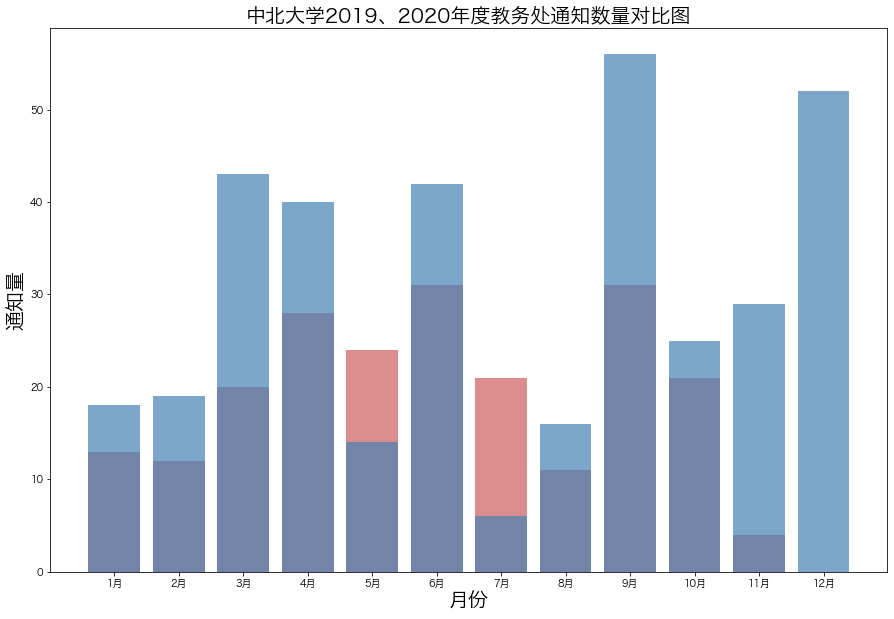

In [11]:
%matplotlib inline
# 准备数据
x_data = []
for month in range(1, 13):
    x_data.append(f"{month}月")

# 接下来统计数据，我们可以开一个12的数组，循环就把计算出来了
y_data_2020 = [0 for i in range(12)]
for t, d, u in info_list:
    if d.year != 2019: 
        continue
    y_data_2020[d.month - 1] += 1
    
y_data_2019 = [0 for i in range(12)]
for t, d, u in info_list:
    if d.year != 2020: 
        continue
    y_data_2019[d.month - 1] += 1

# 绘图
plt.figure(figsize=(15,10))
fontdict={'weight':'normal','size': 20}
plt.title(f"中北大学2019、2020年度教务处通知数量对比图", fontdict=fontdict)

plt.bar(x=x_data, height=y_data_2019, label='2019年度', color='indianred', alpha=0.7)
plt.bar(x=x_data, height=y_data_2020, label='2020年度', color='steelblue', alpha=0.7)

plt.xlabel("月份", fontdict=fontdict)
plt.ylabel("通知量", fontdict=fontdict)

plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']  # 中文字体设置

plt.show()

### 教务处发文类型

In [13]:
# 我们只需要看看是哪种类型的，给个名就行了
cnt = {}
for inx, (t, d, u) in enumerate(info_list):
    if inx == 20:
        break
    try:
        html = urlopen(u)
    except:
        continue
    bs = BeautifulSoup(html.read(), 'lxml')
    content = bs.find('table', {'class':'winstyle54560'})
    seg = content.find_all('a')[2]
    seg_text = seg.text
    if seg_text in cnt.keys():
        cnt[seg_text] += 1
    else:
        cnt[seg_text] = 1

In [14]:
cnt

{'质量管理科': 3, '教务科': 5, '学籍管理科': 2, '实践教学科': 3, '教学研究科': 1, '教材科': 1}

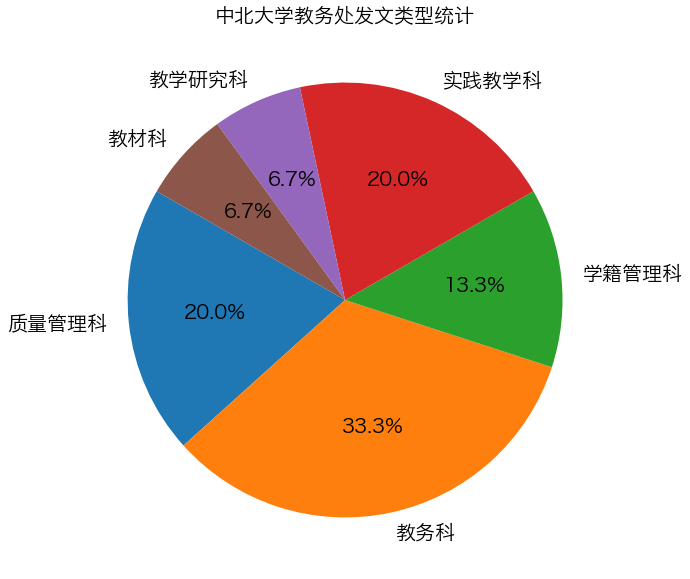

In [27]:
plt.figure(figsize=(10,10))
patches,l_text,p_text = plt.pie(cnt.values(),labels=cnt.keys(),autopct='%1.1f%%',shadow=False,startangle=150)
for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)
plt.title("中北大学教务处发文类型统计", fontdict=fontdict)
plt.show()  